# Framing the problem

### The problem is taken from analytics vidya which is the prediction of Loan status for a particular bank.The link to the problem is https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/

# Importing Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as ses
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as ms

# Obtain Data

In [2]:
data=pd.read_csv('train_bank.csv')

In [3]:
id=data['Loan_ID']
data.drop('Loan_ID',axis=1,inplace=True)

# Analyze Data and Feature Engineering

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 57.6+ KB


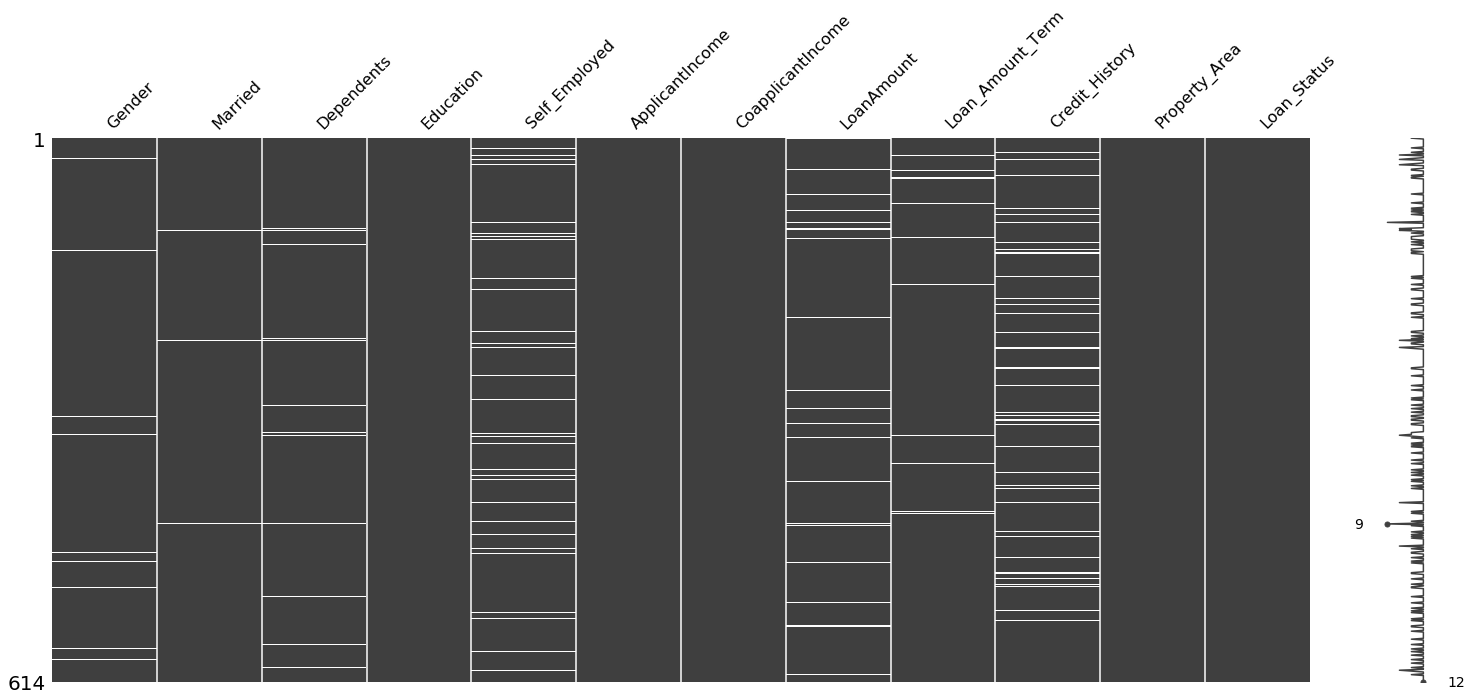

In [5]:
ms.matrix(data)

### Data Visualization

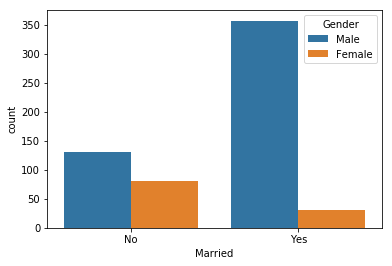

In [6]:
ses.countplot(x=data['Married'],hue=data['Gender'],data=data)

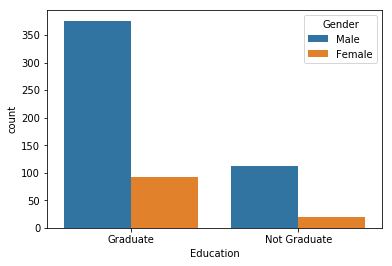

In [7]:
ses.countplot(x=data['Education'],hue=data['Gender'],data=data)

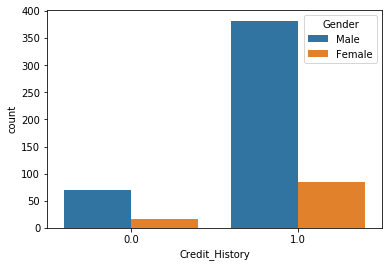

In [8]:
ses.countplot(x=data['Credit_History'],hue=data['Gender'],data=data)

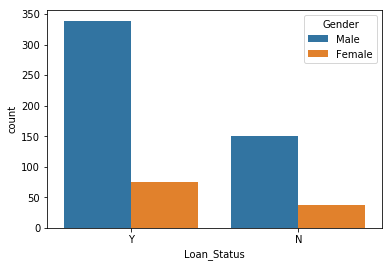

In [9]:
ses.countplot(x=data['Loan_Status'],hue=data['Gender'],data=data)

In [10]:
for i in range(len(id)):
    if pd.isnull(data['Gender'][i]) and data['Married'][i]=='Yes':
        data['Gender'][i]='Male'
    elif pd.isnull(data['Gender'][i]) and data['Education'][i]=='Graduate':
        data['Gender'][i]='Male'
    elif pd.isnull(data['Gender'][i]) and data['Credit_History'][i]==1.0:
        data['Gender'][i]='Male'
    elif pd.isnull(data['Gender'][i]):
        data['Gender'][i]='Female'

C:\Users\hp\AppData\Local\conda\conda\envs\mlw\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\hp\AppData\Local\conda\conda\envs\mlw\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


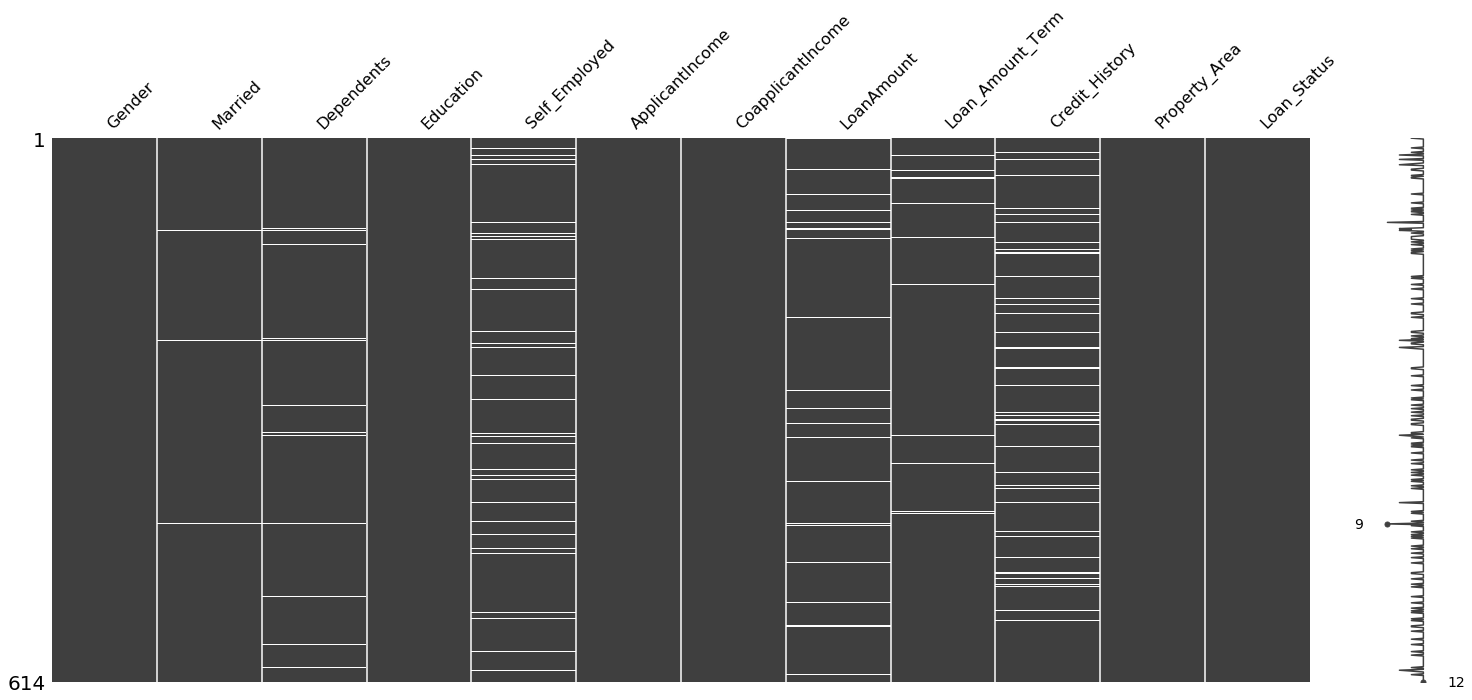

In [11]:
ms.matrix(data)

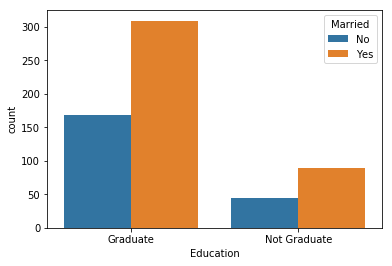

In [12]:
ses.countplot(x=data['Education'],hue=data['Married'],data=data)

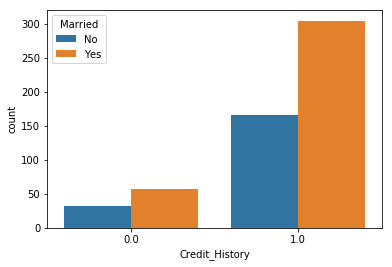

In [13]:
ses.countplot(x=data['Credit_History'],hue=data['Married'],data=data)

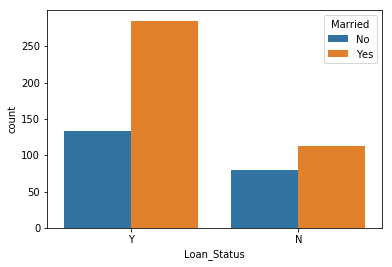

In [14]:
ses.countplot(x=data['Loan_Status'],hue=data['Married'],data=data)

In [15]:
data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

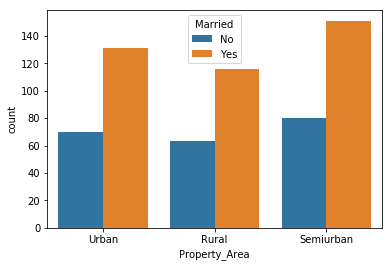

In [16]:
ses.countplot(x=data['Property_Area'],hue=data['Married'],data=data)

In [17]:
data['Married'].fillna('Yes',inplace=True)

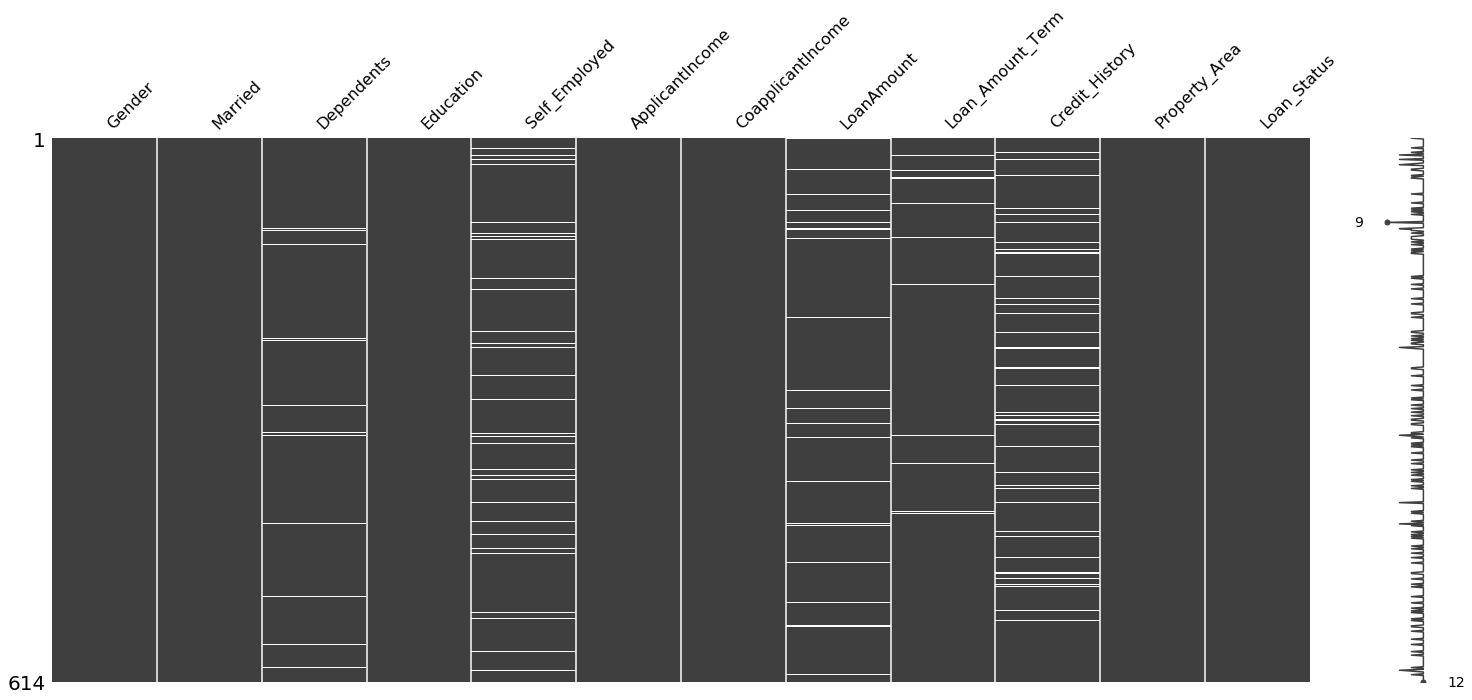

In [18]:
ms.matrix(data)

In [19]:
data.loc[:,['Dependents','CoapplicantIncome']]

,Dependents,CoapplicantIncome
0,0,0.0
1,1,1508.0
2,0,0.0
3,0,2358.0
4,0,0.0
5,2,4196.0
6,0,1516.0
7,3+,2504.0
8,2,1526.0
9,1,10968.0


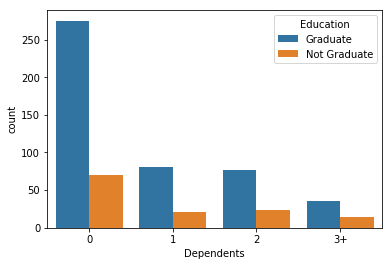

In [20]:
ses.countplot(x=data['Dependents'],hue=data['Education'],data=data)

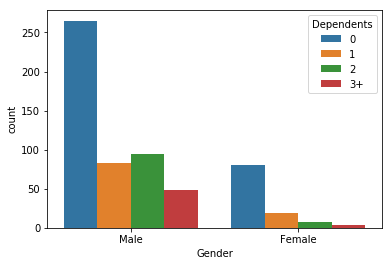

In [21]:
ses.countplot(x=data['Gender'],hue=data['Dependents'],data=data)

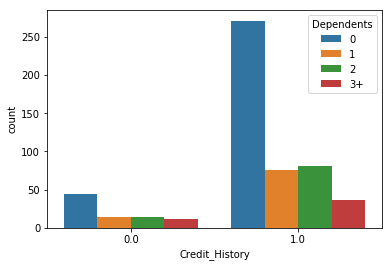

In [22]:
ses.countplot(x=data['Credit_History'],hue=data['Dependents'],data=data)

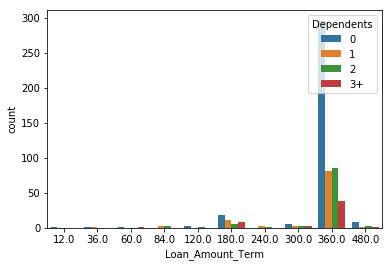

In [23]:
ses.countplot(x=data['Loan_Amount_Term'],hue=data['Dependents'],data=data)

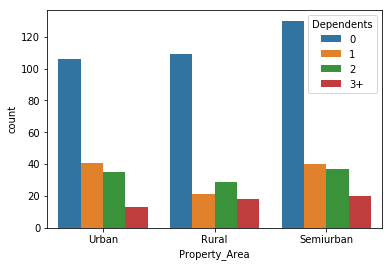

In [24]:
ses.countplot(x=data['Property_Area'],hue=data['Dependents'],data=data)

In [25]:
for i in range(len(id)):
    if pd.isnull(data['Dependents'][i]) and data['CoapplicantIncome'][i]==0.0:
        data['Dependents'][i]='0'
    elif pd.isnull(data['Dependents'][i]) and data['Married'][i]=='No':
        data['Dependents'][i]='0'
    elif pd.isnull(data['Dependents'][i]) and data['Education'][i]=='Graduate':
        data['Dependents'][i]='0'
    elif pd.isnull(data['Dependents'][i]) and data['Credit_History'][i]==1.0:
        data['Dependents'][i]='0'

C:\Users\hp\AppData\Local\conda\conda\envs\mlw\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\hp\AppData\Local\conda\conda\envs\mlw\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\hp\AppData\Local\conda\conda\envs\mlw\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versu

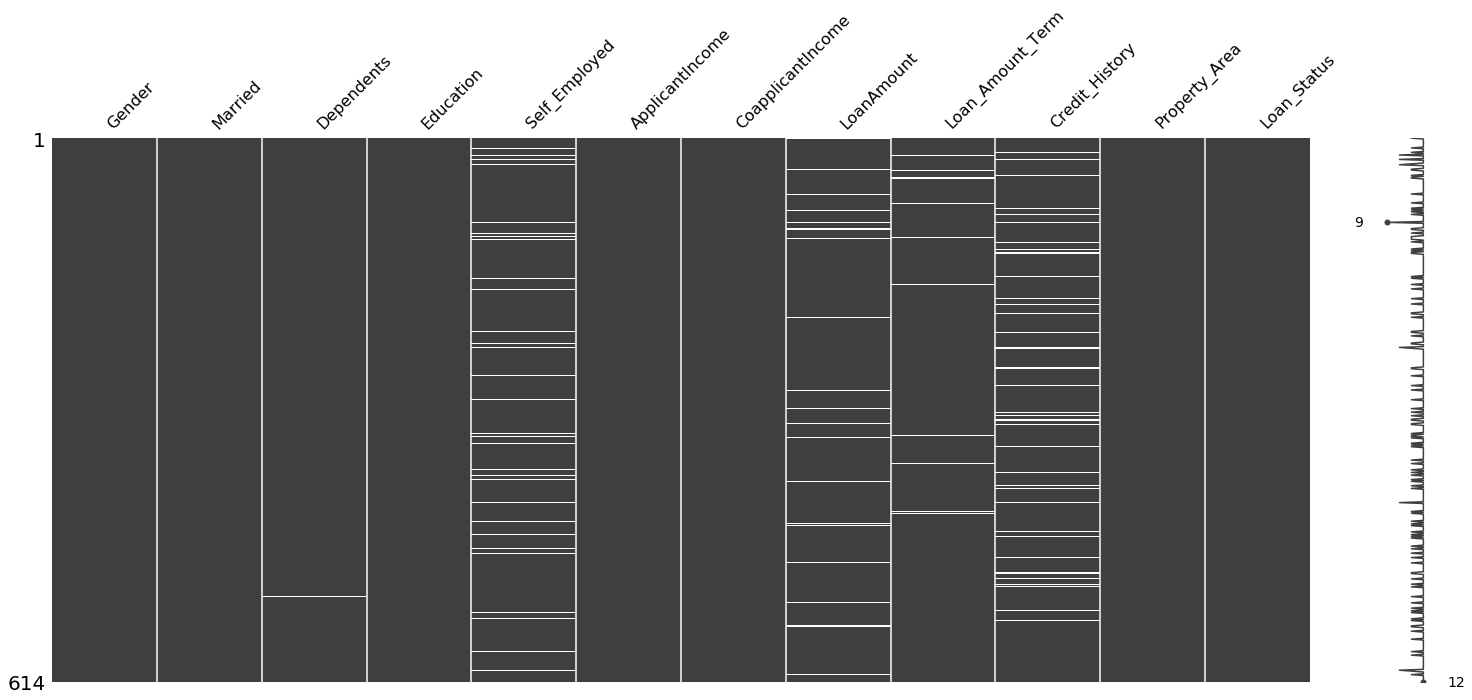

In [26]:
ms.matrix(data)

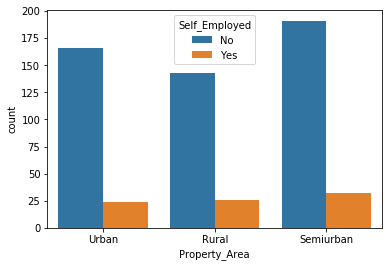

In [27]:
ses.countplot(x=data['Property_Area'],hue=data['Self_Employed'],data=data)

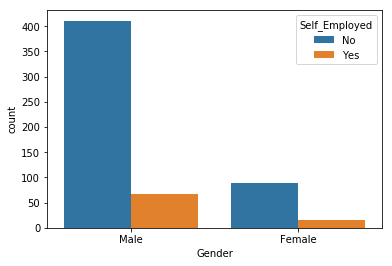

In [28]:
ses.countplot(x=data['Gender'],hue=data['Self_Employed'],data=data)

In [29]:
data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               614 non-null object
Married              614 non-null object
Dependents           612 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 57.6+ KB


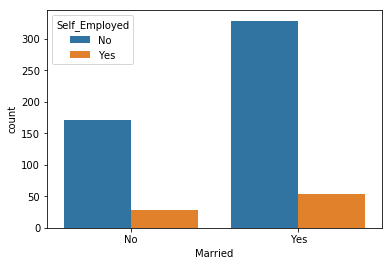

In [31]:
ses.countplot(x=data['Married'],hue=data['Self_Employed'],data=data)

In [32]:
data['Self_Employed'].mode()

0    No
dtype: object

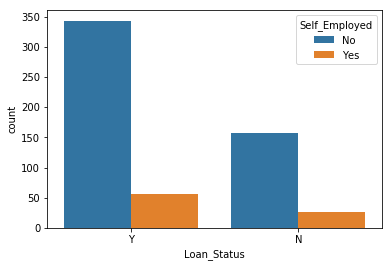

In [33]:
ses.countplot(x=data['Loan_Status'],hue=data['Self_Employed'],data=data)

In [34]:
data['Self_Employed'].fillna('No',inplace=True)

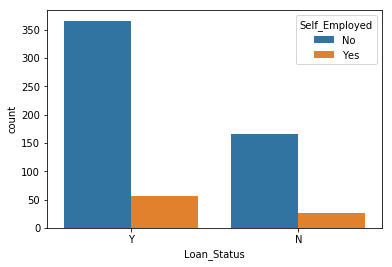

In [35]:
ses.countplot(x=data['Loan_Status'],hue=data['Self_Employed'],data=data)

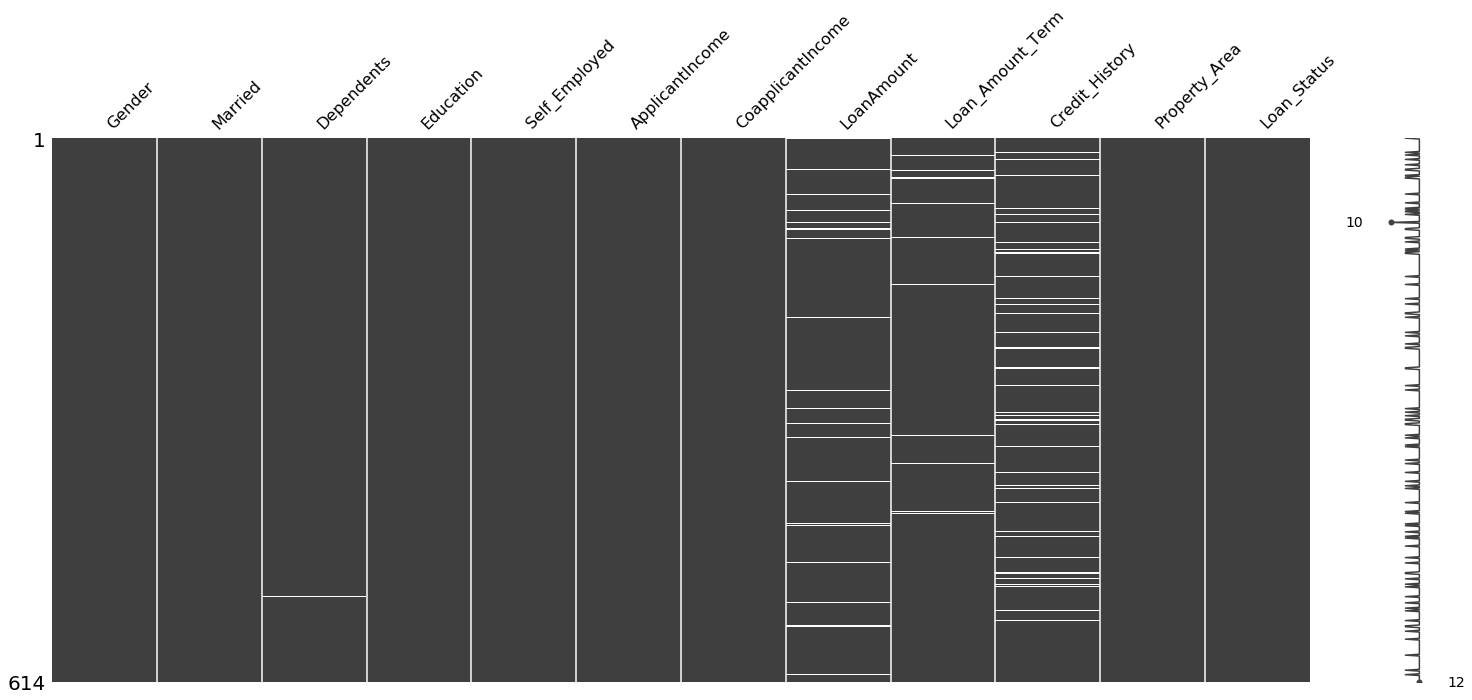

In [36]:
ms.matrix(data)

In [37]:
data['ApplicantIncome'].median()

3812.5

In [38]:
l=list(data['ApplicantIncome'])

In [39]:
l.sort()

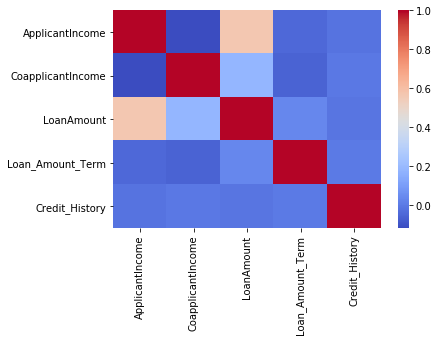

In [40]:
ses.heatmap(data.corr(),cmap='coolwarm')

In [41]:
 totalincome=data['ApplicantIncome']+data['CoapplicantIncome']

In [42]:
data.loc[:,['ApplicantIncome','CoapplicantIncome']]

,ApplicantIncome,CoapplicantIncome
0,5849,0.0
1,4583,1508.0
2,3000,0.0
3,2583,2358.0
4,6000,0.0
5,5417,4196.0
6,2333,1516.0
7,3036,2504.0
8,4006,1526.0
9,12841,10968.0


In [43]:
totalincome

0       5849.0
1       6091.0
2       3000.0
3       4941.0
4       6000.0
5       9613.0
6       3849.0
7       5540.0
8       5532.0
9      23809.0
10      3900.0
11      4340.0
12     11179.0
13      4693.0
14      2385.0
15      4950.0
16      3596.0
17      3510.0
18      4887.0
19      6100.0
20      7660.0
21     11580.0
22      4511.0
23      5282.0
24      6642.0
25      9560.0
26      5052.0
27      5266.0
28      1442.0
29      5833.0
        ...   
584     4704.0
585     7283.0
586     3819.0
587     2165.0
588     4750.0
589     2726.0
590     6416.0
591     6000.0
592     9357.0
593     7159.0
594    16120.0
595     3833.0
596     7383.0
597     2987.0
598     9963.0
599     5780.0
600    42083.0
601     5686.0
602     5703.0
603     7977.0
604    12000.0
605     6200.0
606     5900.0
607     5398.0
608     5182.0
609     2900.0
610     4106.0
611     8312.0
612     7583.0
613     4583.0
Length: 614, dtype: float64

In [44]:
df1=pd.DataFrame(totalincome,columns=['TotalIncome'])

In [45]:
df1

,TotalIncome
0,5849.0
1,6091.0
2,3000.0
3,4941.0
4,6000.0
5,9613.0
6,3849.0
7,5540.0
8,5532.0
9,23809.0


In [46]:
data=pd.concat([data,df1],axis=1)

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Gender               614 non-null object
Married              614 non-null object
Dependents           612 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
TotalIncome          614 non-null float64
dtypes: float64(5), int64(1), object(7)
memory usage: 62.4+ KB


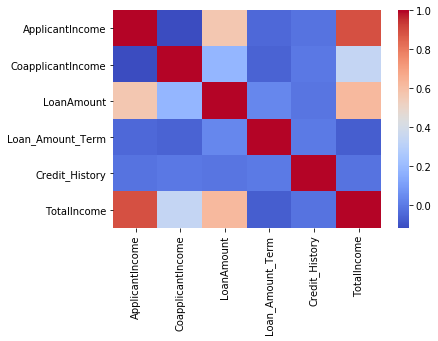

In [48]:
ses.heatmap(data.corr(),cmap='coolwarm')

In [49]:
sum_low=0
sum_high=0
countl=0
counth=0
for i in range(len(id)):
    if data['ApplicantIncome'][i]<data['ApplicantIncome'].median():
        sum_low+=data['ApplicantIncome'][i]
        countl+=1
    else:
        sum_high+=data['ApplicantIncome'][i]
        counth+=1

In [50]:
low_avg=sum_low/countl
high_avg=sum_high/counth

In [51]:
for i in range(len(id)):
    if pd.isnull(data['LoanAmount'][i]) and data['ApplicantIncome'][i]<data['ApplicantIncome'].median():
        data['LoanAmount'][i]=low_avg
    elif pd.isnull(data['LoanAmount'][i]) and data['ApplicantIncome'][i]>=data['ApplicantIncome'].median():
        data['LoanAmount'][i]=high_avg

C:\Users\hp\AppData\Local\conda\conda\envs\mlw\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\hp\AppData\Local\conda\conda\envs\mlw\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


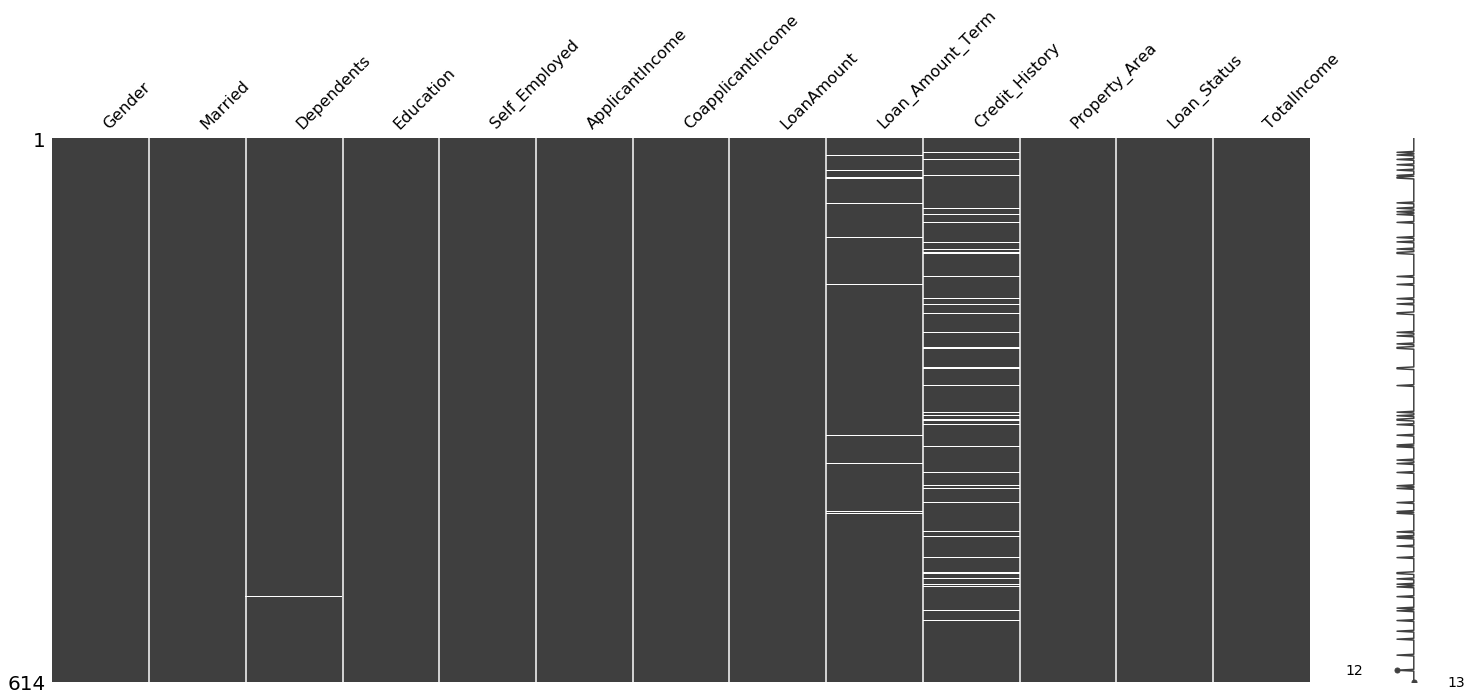

In [52]:
ms.matrix(data)

In [53]:
data['Loan_Amount_Term'].fillna(360.0,inplace=True)

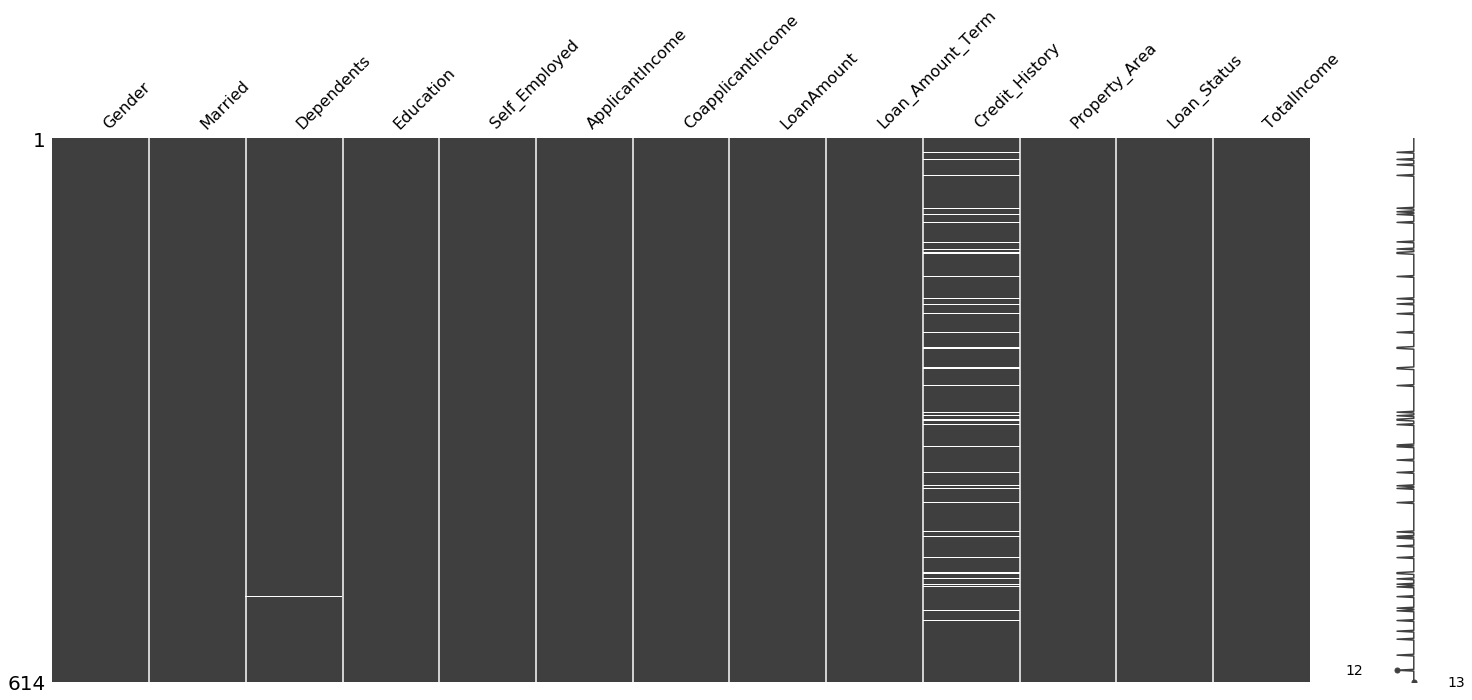

In [54]:
ms.matrix(data)

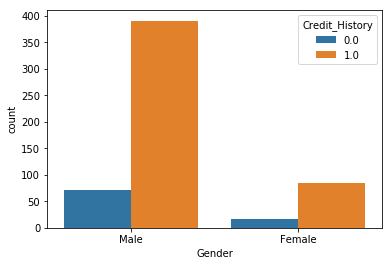

In [55]:
ses.countplot(x=data['Gender'],hue=data['Credit_History'],data=data)

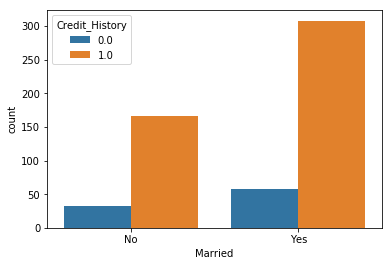

In [56]:
ses.countplot(x=data['Married'],hue=data['Credit_History'],data=data)

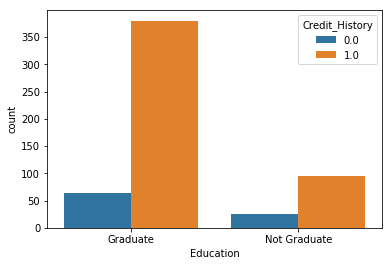

In [57]:
ses.countplot(x=data['Education'],hue=data['Credit_History'],data=data)

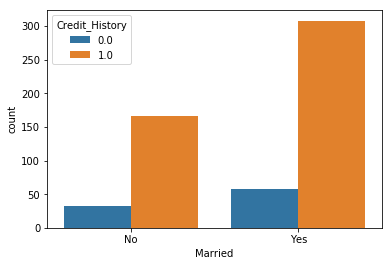

In [58]:
ses.countplot(x=data['Married'],hue=data['Credit_History'],data=data)

In [59]:
for i in range(len(id)):
    if pd.isnull(data['Credit_History'][i]) and data['Education'][i]=='Graduate':
        data['Credit_History'][i]=1.0
    elif pd.isnull(data['Credit_History'][i]) and data['Married'][i]=='Yes':
        data['Credit_History'][i]=1.0

C:\Users\hp\AppData\Local\conda\conda\envs\mlw\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\hp\AppData\Local\conda\conda\envs\mlw\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


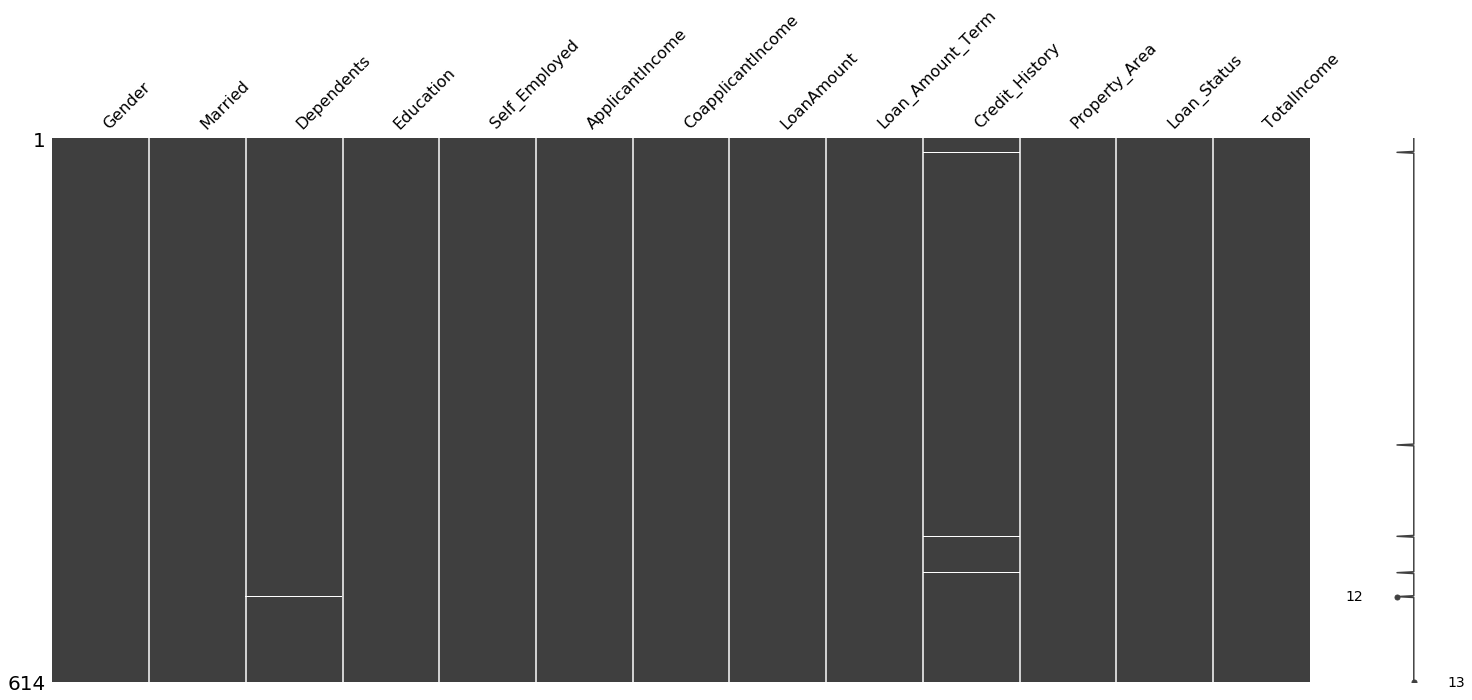

In [60]:
ms.matrix(data)

In [61]:
data.loc[:,['Credit_History','Loan_Status']]

,Credit_History,Loan_Status
0,1.0,Y
1,1.0,N
2,1.0,Y
3,1.0,Y
4,1.0,Y
5,1.0,Y
6,1.0,Y
7,0.0,N
8,1.0,Y
9,1.0,N


In [62]:
for i in range(len(id)):
    if pd.isnull(data['Credit_History'][i]):
        print(data['Loan_Status'][i])

Y
N
Y


In [63]:
data['Credit_History'].fillna(1.0,inplace=True)

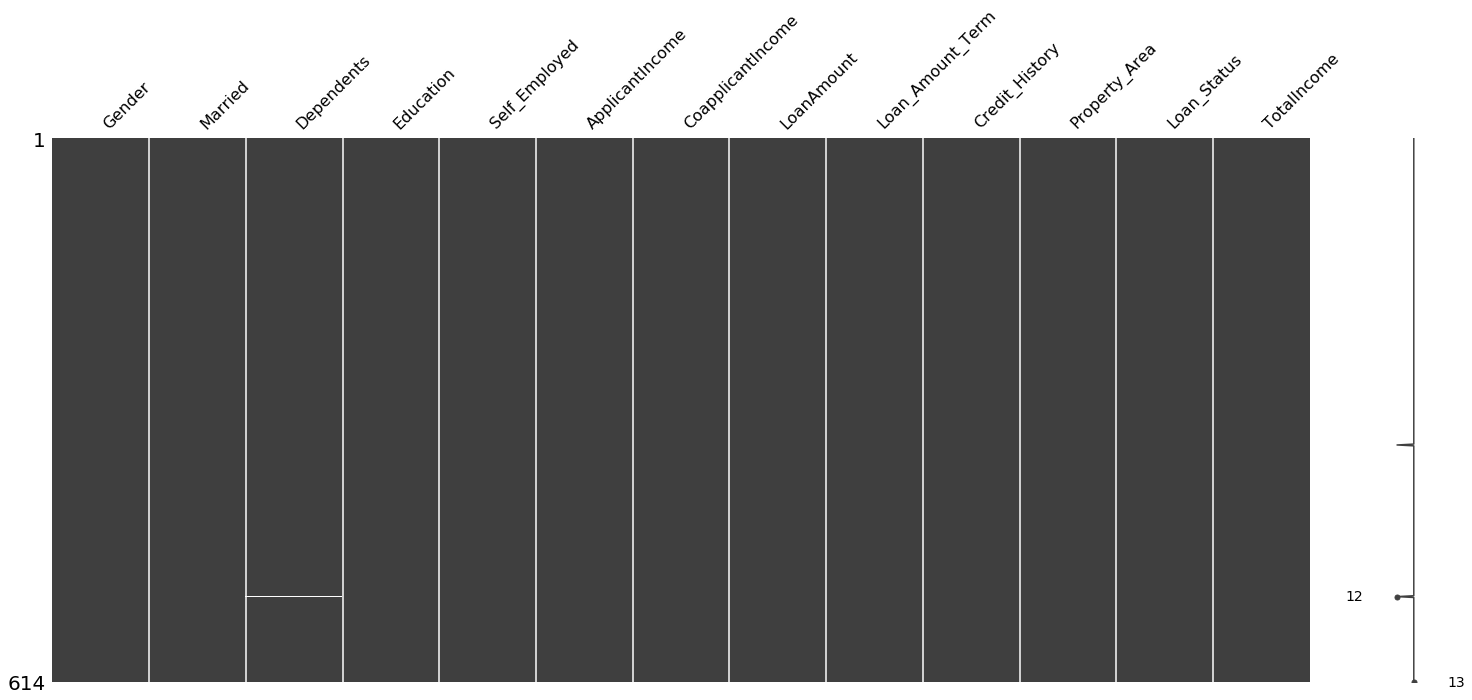

In [64]:
ms.matrix(data)

In [65]:
for i in range(len(id)):
    if data['Dependents'][i]=='0':
        data['Dependents'][i]=int(0)
    elif data['Dependents'][i]=='1':
        data['Dependents'][i]=int(1)
    elif data['Dependents'][i]=='2':
        data['Dependents'][i]=int(2)
    else:
        data['Dependents'][i]=int(3)

C:\Users\hp\AppData\Local\conda\conda\envs\mlw\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\hp\AppData\Local\conda\conda\envs\mlw\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\hp\AppData\Local\conda\conda\envs\mlw\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [66]:
data['Dependents']

0      0
1      1
2      0
3      0
4      0
5      2
6      0
7      3
8      2
9      1
10     2
11     2
12     2
13     0
14     2
15     0
16     1
17     0
18     0
19     0
20     0
21     1
22     0
23     2
24     1
25     0
26     0
27     2
28     0
29     2
      ..
584    1
585    1
586    0
587    0
588    0
589    2
590    0
591    2
592    3
593    0
594    0
595    0
596    2
597    0
598    0
599    2
600    3
601    0
602    3
603    0
604    1
605    0
606    1
607    2
608    0
609    0
610    3
611    1
612    2
613    0
Name: Dependents, Length: 614, dtype: object

In [67]:
dep=data['Dependents'].astype(int)

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
TotalIncome          614 non-null float64
dtypes: float64(5), int64(1), object(7)
memory usage: 62.4+ KB


# Categorical Conversion

In [69]:
gender=pd.get_dummies(data['Gender'],drop_first=True)
married=pd.get_dummies(data['Married'],drop_first=True)
edu=pd.get_dummies(data['Education'],drop_first=True)
self=pd.get_dummies(data['Self_Employed'],drop_first=True)
prop=pd.get_dummies(data['Property_Area'],drop_first=True)
status=pd.get_dummies(data['Loan_Status'],drop_first=True)
data.drop(['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status'],axis=1,inplace=True)
self.columns=['self']
data=pd.concat([data,gender,married,edu,prop,status,self,dep],axis=1)

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
TotalIncome          614 non-null float64
Male                 614 non-null uint8
Yes                  614 non-null uint8
Not Graduate         614 non-null uint8
Semiurban            614 non-null uint8
Urban                614 non-null uint8
Y                    614 non-null uint8
self                 614 non-null uint8
Dependents           614 non-null int32
dtypes: float64(5), int32(1), int64(1), uint8(7)
memory usage: 35.5 KB


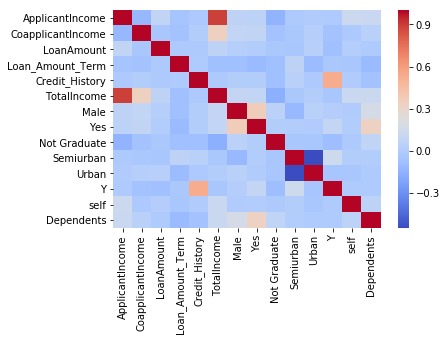

In [71]:
ses.heatmap(data.corr(),cmap='coolwarm')

# Model Selection and Tuning 

In [72]:
from xgboost.sklearn import XGBClassifier

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train,X_test,y_train,y_test=train_test_split(data.drop('Y',axis=1),data['Y'],test_size=0.30)

In [137]:
xgb = XGBClassifier(
 learning_rate =0.01,
 n_estimators=25,
 max_depth=1,
 min_child_weight=1,
 gamma=0.0,
 subsample=0.2,
    reg_alpha=1e-5,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=28)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0.0, learning_rate=0.01,
       max_delta_step=0, max_depth=1, min_child_weight=1, missing=None,
       n_estimators=25, n_jobs=1, nthread=4, objective='binary:logistic',
       random_state=0, reg_alpha=1e-05, reg_lambda=1, scale_pos_weight=1,
       seed=28, silent=True, subsample=0.2)

In [121]:
from sklearn.grid_search import GridSearchCV

In [136]:
parameters = {
                'subsample':[0.1,0.15,0.2,0.25,0.3]
             }
xgb_grid = GridSearchCV(xgb,
                        parameters,
                        cv = 3,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train,
         y_train)
print(xgb_grid.grid_scores_)
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[mean: 0.70862, std: 0.03430, params: {'subsample': 0.1}, mean: 0.78555, std: 0.01069, params: {'subsample': 0.15}, mean: 0.80186, std: 0.02823, params: {'subsample': 0.2}, mean: 0.80186, std: 0.02823, params: {'subsample': 0.25}, mean: 0.80186, std: 0.02823, params: {'subsample': 0.3}]
0.8018648018648019
{'subsample': 0.2}


[Parallel(n_jobs=5)]: Done  15 out of  15 | elapsed:    4.3s finished


In [138]:
predict=xgb.predict(X_test)

C:\Users\hp\AppData\Local\conda\conda\envs\mlw\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [139]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,accuracy_score,classification_report

In [140]:
print(confusion_matrix(y_test,predict))

[[ 24  31]
 [  1 129]]


In [141]:
print(accuracy_score(y_test,predict))

0.827027027027027


# Predicting new values and Validation

In [142]:
tdata=pd.read_csv('test_bank.csv')

In [143]:
tdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


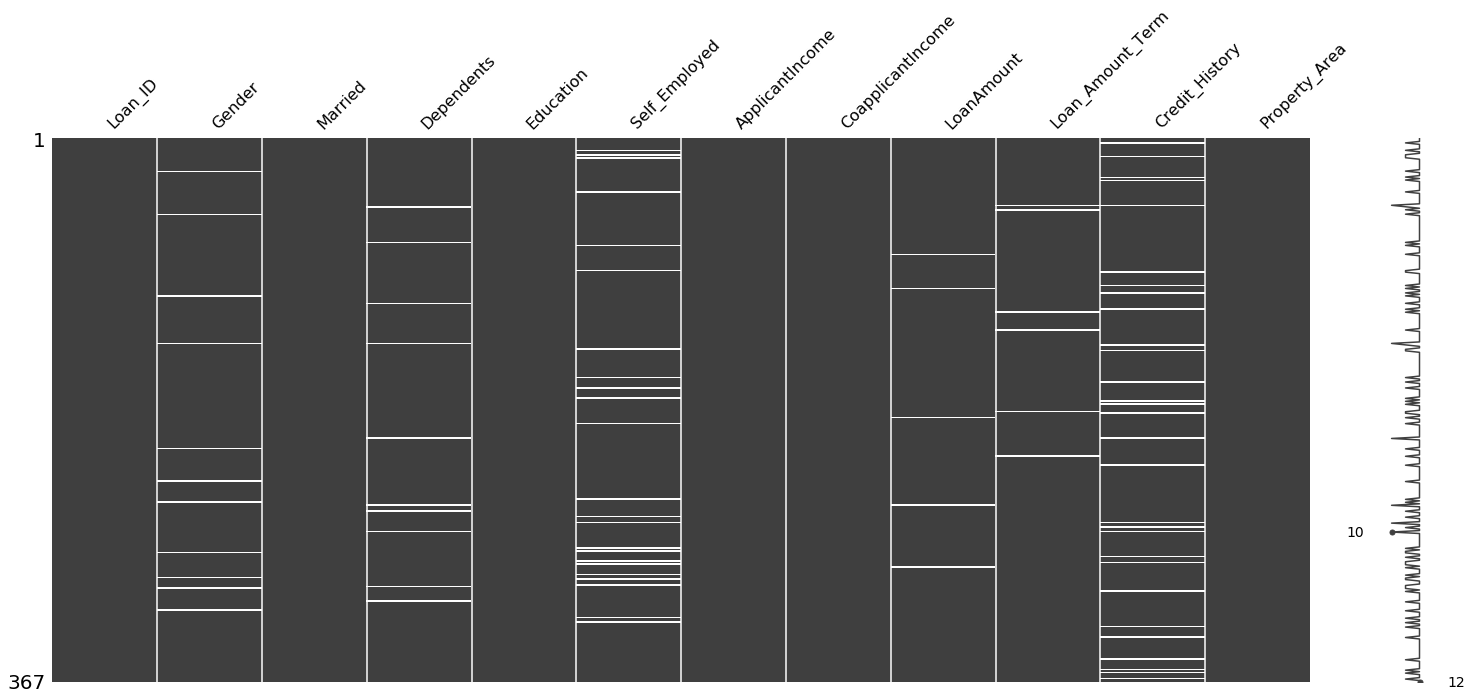

In [144]:
ms.matrix(tdata)

In [145]:
tid=tdata['Loan_ID']
tdata.drop('Loan_ID',axis=1,inplace=True)

In [146]:
for i in range(len(tid)):
    if pd.isnull(tdata['Gender'][i]) and tdata['Married'][i]=='Yes':
        tdata['Gender'][i]='Male'
    elif pd.isnull(tdata['Gender'][i]) and tdata['Education'][i]=='Graduate':
        tdata['Gender'][i]='Male'
    elif pd.isnull(tdata['Gender'][i]) and tdata['Credit_History'][i]==1.0:
        tdata['Gender'][i]='Male'
    elif pd.isnull(tdata['Gender'][i]):
        tdata['Gender'][i]='Female'

C:\Users\hp\AppData\Local\conda\conda\envs\mlw\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\hp\AppData\Local\conda\conda\envs\mlw\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\hp\AppData\Local\conda\conda\envs\mlw\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [147]:
for i in range(len(tid)):
    if pd.isnull(tdata['Dependents'][i]) and tdata['CoapplicantIncome'][i]==0.0:
        tdata['Dependents'][i]='0'
    elif pd.isnull(tdata['Dependents'][i]) and tdata['Married'][i]=='No':
        tdata['Dependents'][i]='0'
    elif pd.isnull(tdata['Dependents'][i]) and tdata['Education'][i]=='Graduate':
        tdata['Dependents'][i]='0'
    elif pd.isnull(tdata['Dependents'][i]) and tdata['Gender'][i]=='Male':
        tdata['Dependents'][i]='0'
    elif pd.isnull(tdata['Dependents'][i]) and tdata['Credit_History'][i]==1.0:
        tdata['Dependents'][i]='0'
    elif pd.isnull(tdata['Dependents'][i]) and tdata['Loan_Amount_Term'][i]==360.0:
        tdata['Dependents'][i]='0'

C:\Users\hp\AppData\Local\conda\conda\envs\mlw\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\hp\AppData\Local\conda\conda\envs\mlw\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\hp\AppData\Local\conda\conda\envs\mlw\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#ind

In [148]:
tdata['Self_Employed'].fillna('No',inplace=True)

In [149]:
 totalincome=tdata['ApplicantIncome']+tdata['CoapplicantIncome']

In [150]:
df1=pd.DataFrame(totalincome,columns=['TotalIncome'])
tdata=pd.concat([tdata,df1],axis=1)

In [151]:
sum_low=0
sum_high=0
countl=0
counth=0
for i in range(len(tid)):
    if tdata['ApplicantIncome'][i]<tdata['ApplicantIncome'].median():
        sum_low+=tdata['ApplicantIncome'][i]
        countl+=1
    else:
        sum_high+=tdata['ApplicantIncome'][i]
        counth+=1

In [152]:
low_avg=sum_low/countl
high_avg=sum_high/counth

In [153]:
for i in range(len(tid)):
    if pd.isnull(tdata['LoanAmount'][i]) and tdata['ApplicantIncome'][i]<tdata['ApplicantIncome'].median():
        tdata['LoanAmount'][i]=low_avg
    elif pd.isnull(tdata['LoanAmount'][i]) and tdata['ApplicantIncome'][i]>=tdata['ApplicantIncome'].median():
        tdata['LoanAmount'][i]=high_avg

C:\Users\hp\AppData\Local\conda\conda\envs\mlw\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\hp\AppData\Local\conda\conda\envs\mlw\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [154]:
tdata['Loan_Amount_Term'].fillna(360.0,inplace=True)

In [155]:
for i in range(len(tid)):
    if pd.isnull(tdata['Credit_History'][i]) and tdata['Education'][i]=='Graduate':
        tdata['Credit_History'][i]=1.0
    elif pd.isnull(tdata['Credit_History'][i]) and tdata['Married'][i]=='Yes':
        tdata['Credit_History'][i]=1.0

C:\Users\hp\AppData\Local\conda\conda\envs\mlw\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\hp\AppData\Local\conda\conda\envs\mlw\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


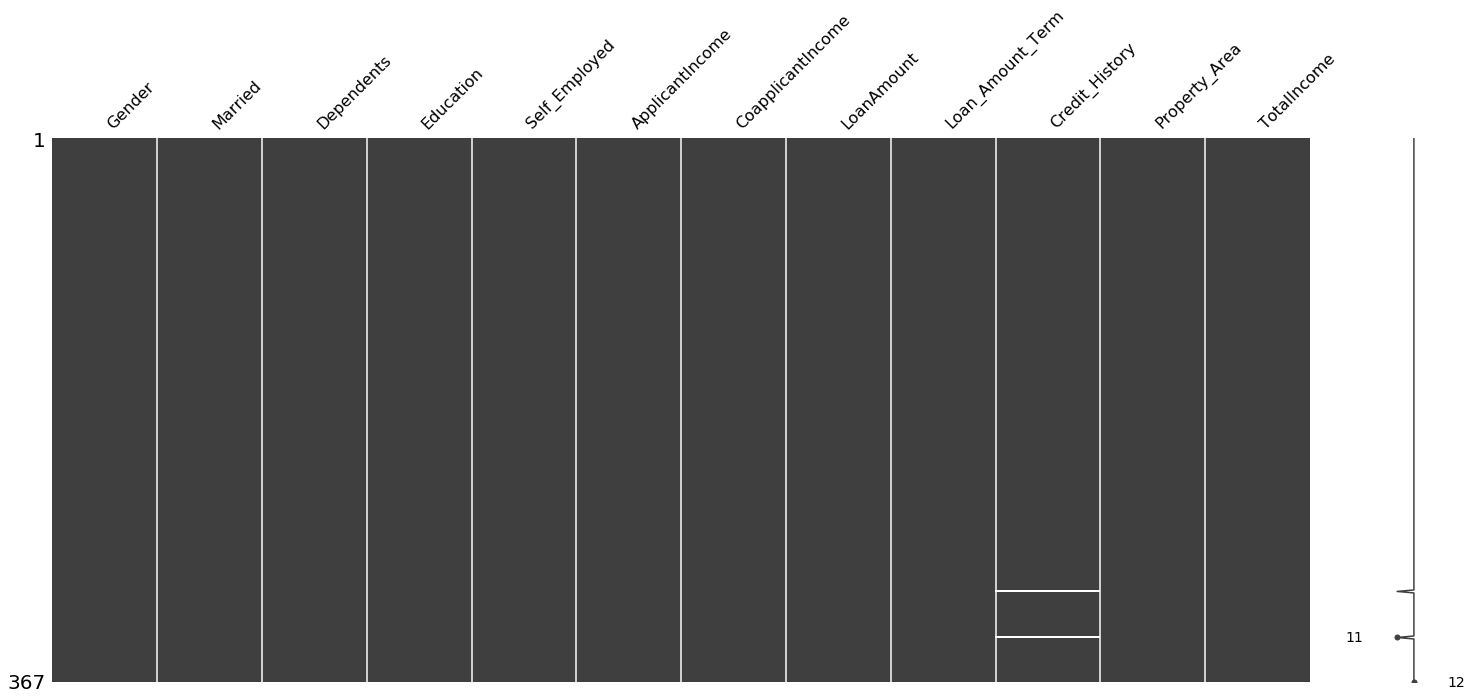

In [156]:
ms.matrix(tdata)

In [157]:
tdata['Credit_History'].fillna(1.0,inplace=True)

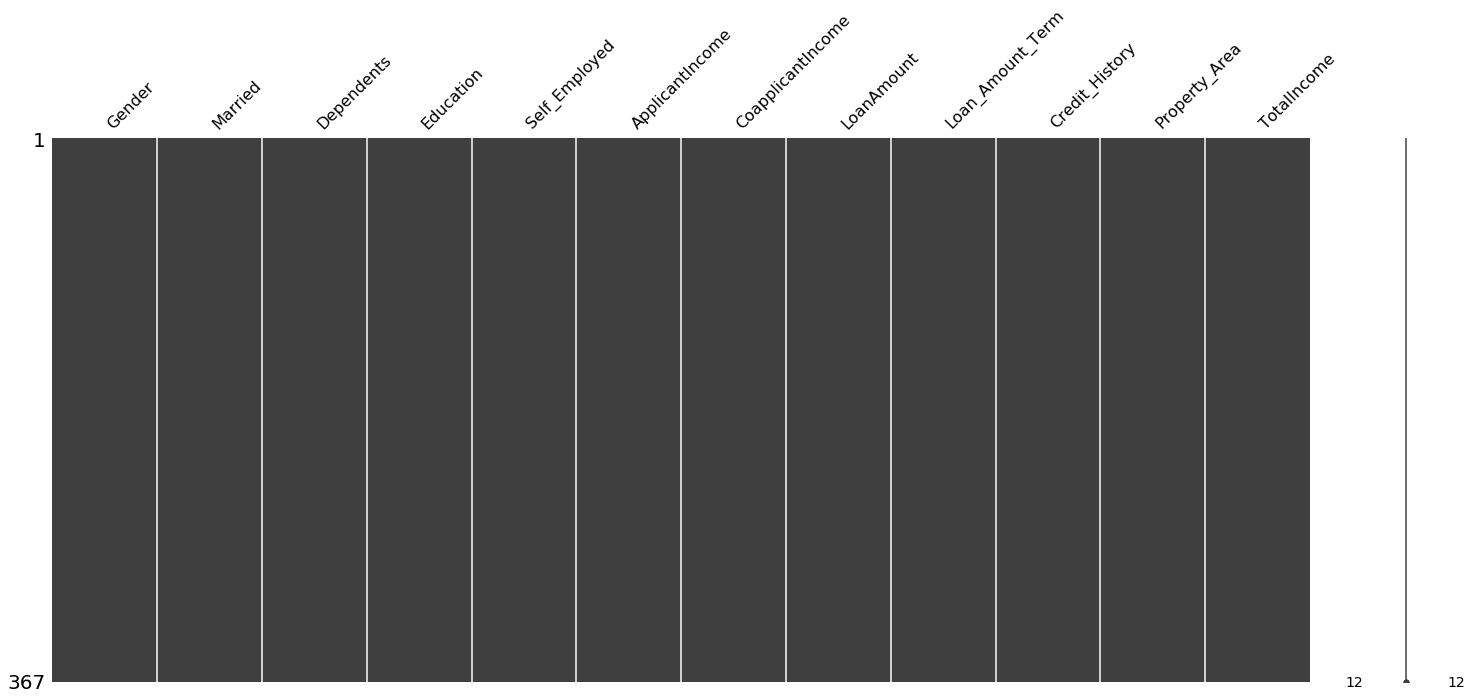

In [158]:
ms.matrix(tdata)

In [159]:
for i in range(len(tid)):
    if tdata['Dependents'][i]=='0':
        tdata['Dependents'][i]=int(0)
    elif tdata['Dependents'][i]=='1':
        tdata['Dependents'][i]=int(1)
    elif tdata['Dependents'][i]=='2':
        tdata['Dependents'][i]=int(2)
    else:
        tdata['Dependents'][i]=int(3)

C:\Users\hp\AppData\Local\conda\conda\envs\mlw\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\hp\AppData\Local\conda\conda\envs\mlw\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\hp\AppData\Local\conda\conda\envs\mlw\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [160]:
dep=tdata['Dependents'].astype(int)

In [161]:
gender=pd.get_dummies(tdata['Gender'],drop_first=True)
married=pd.get_dummies(tdata['Married'],drop_first=True)
edu=pd.get_dummies(tdata['Education'],drop_first=True)
self=pd.get_dummies(tdata['Self_Employed'],drop_first=True)
prop=pd.get_dummies(tdata['Property_Area'],drop_first=True)
tdata.drop(['Gender','Married','Dependents','Education','Self_Employed','Property_Area'],axis=1,inplace=True)
self.columns=['self']
tdata=pd.concat([tdata,gender,married,edu,prop,self,dep],axis=1)

In [162]:
tdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 13 columns):
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           367 non-null float64
Loan_Amount_Term     367 non-null float64
Credit_History       367 non-null float64
TotalIncome          367 non-null int64
Male                 367 non-null uint8
Yes                  367 non-null uint8
Not Graduate         367 non-null uint8
Semiurban            367 non-null uint8
Urban                367 non-null uint8
self                 367 non-null uint8
Dependents           367 non-null int32
dtypes: float64(3), int32(1), int64(3), uint8(6)
memory usage: 20.9 KB


In [163]:
answer=xgb.predict(tdata)

C:\Users\hp\AppData\Local\conda\conda\envs\mlw\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [164]:
df1=pd.DataFrame(tid,columns=['Loan_ID'])

In [165]:
df2=pd.DataFrame(answer,columns=['Loan_Status'])

In [166]:
output=pd.concat([df1,df2],axis=1)

In [167]:
loan=output['Loan_Status']
type(loan)
for i in range(len(loan)):
    if loan[i]==1:
        loan[i]='Y'
    else:
        loan[i]='N'

C:\Users\hp\AppData\Local\conda\conda\envs\mlw\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\hp\AppData\Local\conda\conda\envs\mlw\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [168]:
output.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [169]:
output.to_csv('output1.csv',index=False)